#### This was my first notebook that I executed on a Kaggle kernel using a Kaggle dataset (BlackFriday.csv). Conclusions here are very similar to those presented by other Kaggle users that analyzed this data.  

Import all relevant libraries

In [12]:
%matplotlib inline
import numpy as Numpy
import pandas as Pandas
import matplotlib.pyplot as Plt
import seaborn as Sns
import os as Os

Provide generic input

In [13]:
inpDir = ''
outDir = ''
fileName = 'BlackFriday.csv'
fileTitle = fileName.split('.')[0]

Unzip the data file, read in the dataset and gather some basic info about the dataframe (column names, types, missing data etc.)

In [14]:
#Os.system(f'gunzip {fileName}.gz')
bf = Pandas.read_csv(Os.path.join(inpDir + fileName), index_col=False)
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Fields 'Product_Category_2' and 'Product_Category_3' have missing values. 

The following option makes sure that you can see 'all' the columns when you apply '.describe()' to your data frame

In [15]:
Pandas.set_option('display.expand_frame_repr', False)
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Note that all numeric fields are integer values, even if some of them are stored as float.

Determine the number of levels for all columns.  

In [16]:
print('Number of unique values (levels) for each column')
for cols in list(bf):
    print(f'{bf[cols].nunique()}: {cols}')

Number of unique values (levels) for each column
5891: User_ID
3623: Product_ID
2: Gender
7: Age
21: Occupation
3: City_Category
5: Stay_In_Current_City_Years
2: Marital_Status
18: Product_Category_1
17: Product_Category_2
15: Product_Category_3
17959: Purchase


Different analysis could be performed based on the end-goal.  In this analysis, I am going to assume that the end-goal is to determine the factors that affect 'revenue', which is the total of the 'Purchase' amounts. Here, I am going to refer to the different fields/columns as 'categories' and the different values (levels) within this categories as 'factors'.  With this goal in mind, we will take a preliminary look at the effects of the factors in each of the remaining 11 categories on the revenue.  

But, before we do that we need to fill in the missing values in 'Product_Category_2' and 'Product_Category_3'. Reviewing the list of existing values for these, I chose to use the value of 1 for the missing value.

In [17]:
for cols in ['Product_Category_2', 'Product_Category_3']:
    print(f'{cols}: {sorted(bf[cols].unique())}')
    bf[cols].fillna(value=1, inplace=True)
    bf[cols] = bf[cols].apply(lambda x: int(x))
    print(f'{cols}: {sorted(bf[cols].unique())}')

Product_Category_2: [nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Product_Category_2: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Product_Category_3: [nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Product_Category_3: [1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


Do a pie chart of the sum of the purchases for each of the categories.  For now, I am going to ignore User_ID and Product_ID as there are too many factors in these categories.

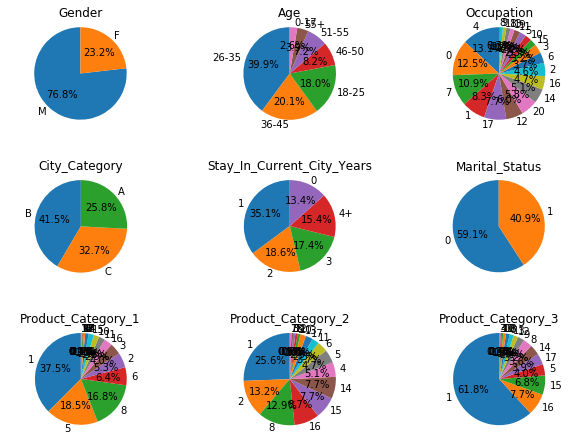

In [18]:
fig1 = Plt.figure(1,figsize=(10,7.5))
fig1.clf()
k = 0
for cols in list(bf)[2:len(list(bf))-1]:    
    k = k + 1
    ax = fig1.add_subplot(3,3,k)
    
    bf_summ = bf[[cols,'Purchase']].groupby([cols])['Purchase'].agg(['sum','count']).reset_index().rename(columns={'sum':'totRev','count': 'totPurch'}).sort_values(['totRev'], ascending=[False])
    ax.pie(bf_summ['totRev'], labels = bf_summ[cols], autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(cols)

fig1.subplots_adjust(hspace=0.5, wspace = 0.5)
#fig1.savefig(Os.path.join(outDir + fileTitle + '_1.png'), dpi=300)

Similar data has been presented by other kernels for this dataset and hence, the conclusions are similar too.  Next, I take a cummulative some of the percentage contributions of each of the factors within each category and identify the (top) factors within each category that contribute most to the revenue.

Cummulative Percentage of top User_ID that accounted for 80% of revenue: 42.7

Cummulative Percentage of top Product_ID that accounted for 80% of revenue: 25.6

Top factors in Gender that accounted for 80% of revenue
  Gender  percRev  cumPercFactor  cumPercRev
1      M    76.79           50.0       76.79


Top factors in Age that accounted for 80% of revenue
     Age  percRev  cumPercFactor  cumPercRev
2  26-35    39.85          14.29       39.85
3  36-45    20.14          28.57       60.00
1  18-25    17.97          42.86       77.97


Top factors in Occupation that accounted for 80% of revenue
    Occupation  percRev  cumPercFactor  cumPercRev
4            4    13.10           4.76       13.10
0            0    12.47           9.52       25.58
7            7    10.95          14.29       36.52
1            1     8.26          19.05       44.79
17          17     7.72          23.81       52.50
12          12     5.99          28.57       58.50
20          20     5.82          33.33 

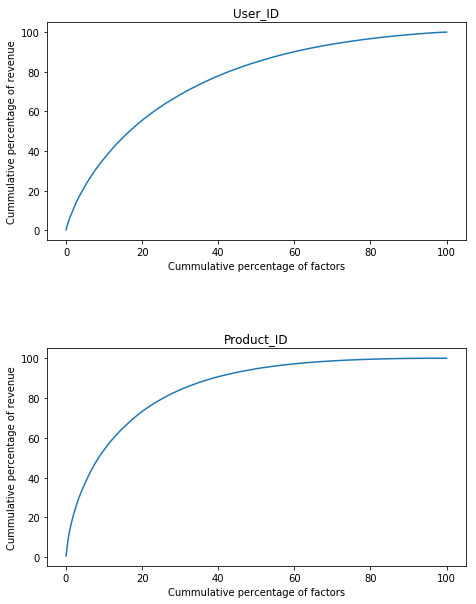

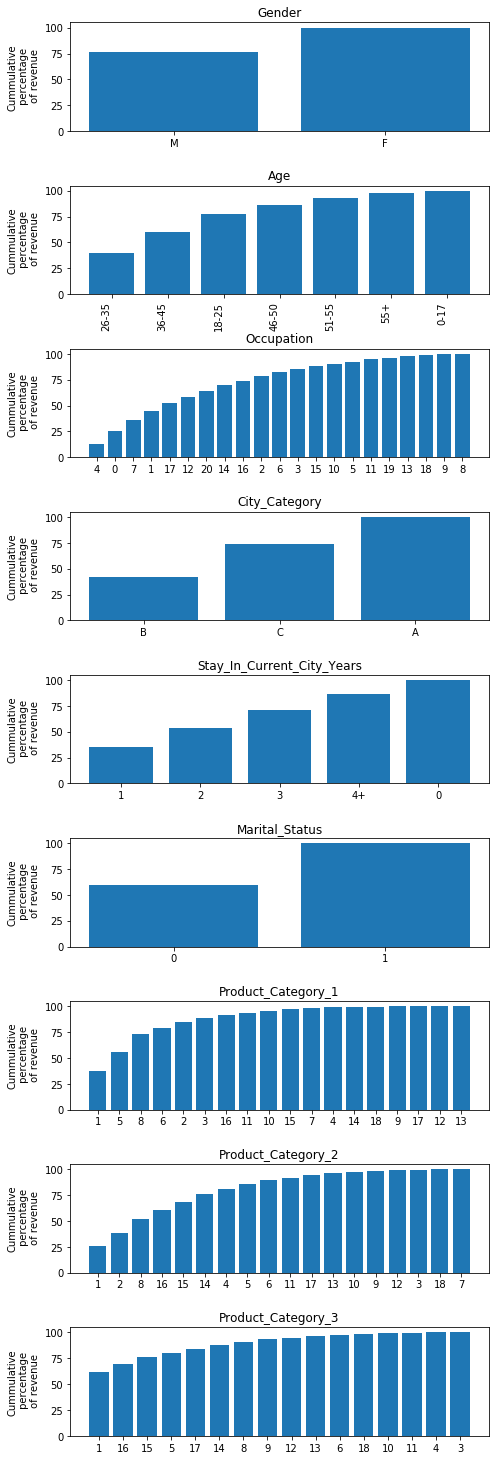

In [19]:
fig2 = Plt.figure(2,figsize=(7.5,10.0))
fig2.clf()
j = 0

fig3 = Plt.figure(3,figsize=(7.5,26.0))
fig2.clf()
k = 0

totRevenue = sum(bf.Purchase)
for cols in list(bf)[0:len(list(bf))-1]:
    # The following two statements could probably be combined and simplified using lambda functions in the '.agg' method.  Will do later.
    bf_summ = bf[[cols,'Purchase']].groupby([cols])['Purchase'].agg(['sum']).reset_index().rename(columns={'sum':'percRev'})

    bf_summ['percRev'] = 100.0*bf_summ['percRev']/totRevenue
    bf_summ = bf_summ.sort_values(['percRev'], ascending=[False]).copy()

    noFactors = bf_summ.shape[0]
    bf_summ['cumPercFactor'] = 100.0*(bf_summ.reset_index().index + 1)/noFactors
    
    bf_summ['cumPercRev'] = round(Numpy.cumsum(bf_summ['percRev']),2)
    bf_summ['percRev'] = round(bf_summ['percRev'],2)
    
    if (cols in ['User_ID', 'Product_ID']):
        j = j + 1
        ax = fig2.add_subplot(2,1,j)
        ax.plot(bf_summ['cumPercFactor'], bf_summ['cumPercRev'])
        ax.set_xlabel('Cummulative percentage of factors')
        ax.set_ylabel('Cummulative percentage of revenue')
        ax.set_title(cols)
        print(f'Cummulative Percentage of top {cols} that accounted for 80% of revenue: {round(bf_summ.iloc[max(max(Numpy.where(bf_summ["cumPercRev"] < 80.0)))]["cumPercFactor"], 1)}\n')
    else:
        k = k + 1
        ax = fig3.add_subplot(9,1,k)
        ax.bar(bf_summ[cols].apply(lambda x: str(x)), bf_summ['cumPercRev'])
        if (cols=='Age'):
            ax.set_xticklabels(bf_summ[cols], rotation='vertical', horizontalalignment="right")
        #ax.set_xlabel('Factors')
        ax.set_ylabel('Cummulative\n percentage\n of revenue')
        ax.set_title(cols)
        bf_summ['cumPercFactor'] = round(bf_summ['cumPercFactor'], 2)
        print(f'Top factors in {bf_summ.columns[0]} that accounted for 80% of revenue')
        print(bf_summ.loc[bf_summ['cumPercRev'] < 80])
        print('\n')
        
fig2.subplots_adjust(hspace=0.5, wspace = 0.0)
#fig2.savefig(Os.path.join(outDir + fileTitle + '_2.png'), dpi=300)

fig3.subplots_adjust(hspace=0.5, wspace = 0.0)
#fig3.savefig(Os.path.join(outDir + fileTitle + '_3.png'), dpi=300)

The first 2 graphs shows that a larger percentage of revenue comes from a smaller percentage of the factors for both User_ID and Product_ID.  
For instance, 80% of the revenue is achieved by the (top) 43% of the users (User_IDs) or 26% of the products (Product_IDs).  So, I could use the data to maybe in the future focus on the purchase patterns of these specific users only and/or on the sale of these specific products only.

Similarly for some of the other categories, we can conclude
* Age groups of 18-50 account for roughly 86% of the revenue.  
* Factors 1, 5, 6, and 8 in Product_Category_1 account for roughly 80% of the revenue.
* The top ten (out of 21) occupations account for roughly 79% of the revenue

This is a preliminary analysis and I plan to make some of these plots and data more presentable and provide additional analysis and plots in later versions of this kernel.